# Упражнение на нейронные сети/Keras

In [1]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
# boston - regression
# breast - binary
# iris - multiclass
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from statistics import mean
import matplotlib.pyplot as plt
import keras

from keras.utils import np_utils
np.random.seed(7)

/Users/sharafutdinovruslan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Бинарная классификация

In [2]:
# бинарная классификация
data = load_breast_cancer()
X = data.data
y = data.target
# print(y[:10])

In [3]:
# Делим выборку на 5 фолдов
folds = list(
    KFold(n_splits=5, shuffle=True, random_state=1).split(X, y)
)

In [4]:
# Зависимость от параметра lr
model = Sequential()
outList = list()
lrGrid = np.linspace(10e-6, 10e-5, 5)
for i in lrGrid:
    print('lr = ', i)
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(lr=i)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    scoreList = list()
    for j in range(5):
        print('NFold = ', j)
        model.fit(X[folds[j][0]], y[folds[j][0]], epochs=150, batch_size=10)
        scores = model.evaluate(X[folds[j][1]], y[folds[j][1]])
        scoreList.append(scores[1]*100)
    outList.append(mean(scoreList))


lr =  1e-05
NFold =  0
Epoch 1/150
455/455 [==============================] - 1s 1ms/step - loss: 10.0959 - acc: 0.3736
Epoch 2/150
455/455 [==============================] - 0s 222us/step - loss: 10.0959 - acc: 0.3736
Epoch 3/150
455/455 [==============================] - 0s 193us/step - loss: 10.0959 - acc: 0.3736
Epoch 4/150
455/455 [==============================] - 0s 178us/step - loss: 10.0959 - acc: 0.3736
Epoch 5/150
455/455 [==============================] - 0s 177us/step - loss: 10.0959 - acc: 0.3736
Epoch 6/150
455/455 [==============================] - 0s 189us/step - loss: 10.0960 - acc: 0.3736
Epoch 7/150
455/455 [==============================] - 0s 179us/step - loss: 10.0959 - acc: 0.3736
Epoch 8/150
455/455 [==============================] - 0s 188us/step - loss: 10.0959 - acc: 0.3736
Epoch 9/150
455/455 [==============================] - 0s 201us/step - loss: 10.0959 - acc: 0.3736
Epoch 10/150
455/455 [==============================] - 0s 201us/step - loss: 10.0959 - 

455/455 [==============================] - 0s 182us/step - loss: 10.0959 - acc: 0.3736
Epoch 83/150
455/455 [==============================] - 0s 175us/step - loss: 10.0959 - acc: 0.3736
Epoch 84/150
455/455 [==============================] - 0s 172us/step - loss: 10.0960 - acc: 0.3736
Epoch 85/150
455/455 [==============================] - 0s 177us/step - loss: 10.0959 - acc: 0.3736
Epoch 86/150
455/455 [==============================] - 0s 171us/step - loss: 10.0960 - acc: 0.3736
Epoch 87/150
455/455 [==============================] - 0s 175us/step - loss: 10.0959 - acc: 0.3736
Epoch 88/150
455/455 [==============================] - 0s 171us/step - loss: 10.0959 - acc: 0.3736
Epoch 89/150
455/455 [==============================] - 0s 169us/step - loss: 10.0959 - acc: 0.3736
Epoch 90/150
455/455 [==============================] - 0s 170us/step - loss: 10.0959 - acc: 0.3736
Epoch 91/150
455/455 [==============================] - 0s 173us/step - loss: 10.0959 - acc: 0.3736
Epoch 92/150


455/455 [==============================] - 0s 199us/step - loss: 9.9543 - acc: 0.3824
Epoch 14/150
455/455 [==============================] - 0s 187us/step - loss: 9.9543 - acc: 0.3824
Epoch 15/150
455/455 [==============================] - 0s 189us/step - loss: 9.9543 - acc: 0.3824
Epoch 16/150
455/455 [==============================] - 0s 191us/step - loss: 9.9543 - acc: 0.3824
Epoch 17/150
455/455 [==============================] - 0s 192us/step - loss: 9.9543 - acc: 0.3824
Epoch 18/150
455/455 [==============================] - 0s 221us/step - loss: 9.9543 - acc: 0.3824
Epoch 19/150
455/455 [==============================] - 0s 206us/step - loss: 9.9543 - acc: 0.3824
Epoch 20/150
455/455 [==============================] - 0s 187us/step - loss: 9.9543 - acc: 0.3824
Epoch 21/150
455/455 [==============================] - 0s 199us/step - loss: 9.9543 - acc: 0.3824
Epoch 22/150
455/455 [==============================] - 0s 200us/step - loss: 9.9543 - acc: 0.3824
Epoch 23/150
455/455 [=

455/455 [==============================] - 0s 174us/step - loss: 9.9543 - acc: 0.3824
Epoch 96/150
455/455 [==============================] - 0s 168us/step - loss: 9.9543 - acc: 0.3824
Epoch 97/150
455/455 [==============================] - 0s 170us/step - loss: 9.9543 - acc: 0.3824
Epoch 98/150
455/455 [==============================] - 0s 172us/step - loss: 9.9543 - acc: 0.3824
Epoch 99/150
455/455 [==============================] - 0s 168us/step - loss: 9.9543 - acc: 0.3824
Epoch 100/150
455/455 [==============================] - 0s 169us/step - loss: 9.9543 - acc: 0.3824
Epoch 101/150
455/455 [==============================] - 0s 168us/step - loss: 9.9543 - acc: 0.3824
Epoch 102/150
455/455 [==============================] - 0s 169us/step - loss: 9.9543 - acc: 0.3824
Epoch 103/150
455/455 [==============================] - 0s 169us/step - loss: 9.9543 - acc: 0.3824
Epoch 104/150
455/455 [==============================] - 0s 169us/step - loss: 9.9543 - acc: 0.3824
Epoch 105/150
455/

455/455 [==============================] - 0s 169us/step - loss: 10.2731 - acc: 0.3626
Epoch 27/150
455/455 [==============================] - 0s 172us/step - loss: 10.2731 - acc: 0.3626
Epoch 28/150
455/455 [==============================] - 0s 171us/step - loss: 10.2731 - acc: 0.3626
Epoch 29/150
455/455 [==============================] - 0s 170us/step - loss: 10.2731 - acc: 0.3626
Epoch 30/150
455/455 [==============================] - 0s 166us/step - loss: 10.2731 - acc: 0.3626
Epoch 31/150
455/455 [==============================] - 0s 171us/step - loss: 10.2731 - acc: 0.3626
Epoch 32/150
455/455 [==============================] - 0s 174us/step - loss: 10.2731 - acc: 0.3626
Epoch 33/150
455/455 [==============================] - 0s 171us/step - loss: 10.2731 - acc: 0.3626
Epoch 34/150
455/455 [==============================] - 0s 172us/step - loss: 10.2731 - acc: 0.3626
Epoch 35/150
455/455 [==============================] - 0s 172us/step - loss: 10.2731 - acc: 0.3626
Epoch 36/150


Epoch 108/150
455/455 [==============================] - 0s 169us/step - loss: 10.2731 - acc: 0.3626
Epoch 109/150
455/455 [==============================] - 0s 172us/step - loss: 10.2731 - acc: 0.3626
Epoch 110/150
455/455 [==============================] - 0s 170us/step - loss: 10.2731 - acc: 0.3626
Epoch 111/150
455/455 [==============================] - 0s 171us/step - loss: 10.2731 - acc: 0.3626
Epoch 112/150
455/455 [==============================] - 0s 172us/step - loss: 10.2731 - acc: 0.3626
Epoch 113/150
455/455 [==============================] - 0s 169us/step - loss: 10.2731 - acc: 0.3626
Epoch 114/150
455/455 [==============================] - 0s 168us/step - loss: 10.2731 - acc: 0.3626
Epoch 115/150
455/455 [==============================] - 0s 169us/step - loss: 10.2731 - acc: 0.3626
Epoch 116/150
455/455 [==============================] - 0s 168us/step - loss: 10.2731 - acc: 0.3626
Epoch 117/150
455/455 [==============================] - 0s 165us/step - loss: 10.2731 - ac

455/455 [==============================] - 0s 176us/step - loss: 10.0251 - acc: 0.3780
Epoch 39/150
455/455 [==============================] - 0s 170us/step - loss: 10.0251 - acc: 0.3780
Epoch 40/150
455/455 [==============================] - 0s 173us/step - loss: 10.0251 - acc: 0.3780
Epoch 41/150
455/455 [==============================] - 0s 170us/step - loss: 10.0251 - acc: 0.3780
Epoch 42/150
455/455 [==============================] - 0s 170us/step - loss: 10.0251 - acc: 0.3780
Epoch 43/150
455/455 [==============================] - 0s 171us/step - loss: 10.0251 - acc: 0.3780
Epoch 44/150
455/455 [==============================] - 0s 170us/step - loss: 10.0251 - acc: 0.3780
Epoch 45/150
455/455 [==============================] - 0s 169us/step - loss: 10.0251 - acc: 0.3780
Epoch 46/150
455/455 [==============================] - 0s 172us/step - loss: 10.0251 - acc: 0.3780
Epoch 47/150
455/455 [==============================] - 0s 171us/step - loss: 10.0251 - acc: 0.3780
Epoch 48/150


455/455 [==============================] - 0s 210us/step - loss: 10.0251 - acc: 0.3780
Epoch 120/150
455/455 [==============================] - 0s 193us/step - loss: 10.0251 - acc: 0.3780
Epoch 121/150
455/455 [==============================] - 0s 180us/step - loss: 10.0251 - acc: 0.3780
Epoch 122/150
455/455 [==============================] - 0s 181us/step - loss: 10.0251 - acc: 0.3780
Epoch 123/150
455/455 [==============================] - 0s 186us/step - loss: 10.0251 - acc: 0.3780
Epoch 124/150
455/455 [==============================] - 0s 262us/step - loss: 10.0251 - acc: 0.3780
Epoch 125/150
455/455 [==============================] - 0s 280us/step - loss: 10.0251 - acc: 0.3780
Epoch 126/150
455/455 [==============================] - 0s 198us/step - loss: 10.0251 - acc: 0.3780
Epoch 127/150
455/455 [==============================] - 0s 180us/step - loss: 10.0251 - acc: 0.3780
Epoch 128/150
455/455 [==============================] - 0s 183us/step - loss: 10.0251 - acc: 0.3780
Epoc

456/456 [==============================] - 0s 230us/step - loss: 10.2152 - acc: 0.3662
Epoch 51/150
456/456 [==============================] - 0s 218us/step - loss: 10.2152 - acc: 0.3662
Epoch 52/150
456/456 [==============================] - 0s 205us/step - loss: 10.2152 - acc: 0.3662
Epoch 53/150
456/456 [==============================] - 0s 252us/step - loss: 10.2152 - acc: 0.3662
Epoch 54/150
456/456 [==============================] - 0s 247us/step - loss: 10.2152 - acc: 0.3662
Epoch 55/150
456/456 [==============================] - 0s 218us/step - loss: 10.2152 - acc: 0.3662
Epoch 56/150
456/456 [==============================] - 0s 182us/step - loss: 10.2152 - acc: 0.3662
Epoch 57/150
456/456 [==============================] - 0s 175us/step - loss: 10.2152 - acc: 0.3662
Epoch 58/150
456/456 [==============================] - 0s 171us/step - loss: 10.2152 - acc: 0.3662
Epoch 59/150
456/456 [==============================] - 0s 173us/step - loss: 10.2152 - acc: 0.3662
Epoch 60/150


456/456 [==============================] - 0s 223us/step - loss: 10.2152 - acc: 0.3662
Epoch 132/150
456/456 [==============================] - 0s 203us/step - loss: 10.2152 - acc: 0.3662
Epoch 133/150
456/456 [==============================] - 0s 210us/step - loss: 10.2152 - acc: 0.3662
Epoch 134/150
456/456 [==============================] - 0s 212us/step - loss: 10.2152 - acc: 0.3662
Epoch 135/150
456/456 [==============================] - 0s 203us/step - loss: 10.2152 - acc: 0.3662
Epoch 136/150
456/456 [==============================] - 0s 209us/step - loss: 10.2152 - acc: 0.3662
Epoch 137/150
456/456 [==============================] - 0s 239us/step - loss: 10.2152 - acc: 0.3662
Epoch 138/150
456/456 [==============================] - 0s 284us/step - loss: 10.2152 - acc: 0.3662
Epoch 139/150
456/456 [==============================] - 0s 274us/step - loss: 10.2152 - acc: 0.3662
Epoch 140/150
456/456 [==============================] - 0s 223us/step - loss: 10.2152 - acc: 0.3662
Epoc

455/455 [==============================] - 0s 194us/step - loss: 0.6864 - acc: 0.6264
Epoch 63/150
455/455 [==============================] - 0s 184us/step - loss: 0.6863 - acc: 0.6264
Epoch 64/150
455/455 [==============================] - 0s 189us/step - loss: 0.6862 - acc: 0.6264
Epoch 65/150
455/455 [==============================] - 0s 206us/step - loss: 0.6861 - acc: 0.6264
Epoch 66/150
455/455 [==============================] - 0s 220us/step - loss: 0.6860 - acc: 0.6264
Epoch 67/150
455/455 [==============================] - 0s 227us/step - loss: 0.6859 - acc: 0.6264
Epoch 68/150
455/455 [==============================] - 0s 220us/step - loss: 0.6858 - acc: 0.6264
Epoch 69/150
455/455 [==============================] - 0s 232us/step - loss: 0.6858 - acc: 0.6264
Epoch 70/150
455/455 [==============================] - 0s 228us/step - loss: 0.6857 - acc: 0.6264
Epoch 71/150
455/455 [==============================] - 0s 198us/step - loss: 0.6856 - acc: 0.6264
Epoch 72/150
455/455 [=

455/455 [==============================] - 0s 218us/step - loss: 0.6794 - acc: 0.6264
Epoch 145/150
455/455 [==============================] - 0s 210us/step - loss: 0.6793 - acc: 0.6264
Epoch 146/150
455/455 [==============================] - 0s 265us/step - loss: 0.6793 - acc: 0.6264
Epoch 147/150
455/455 [==============================] - 0s 313us/step - loss: 0.6792 - acc: 0.6264
Epoch 148/150
455/455 [==============================] - 0s 266us/step - loss: 0.6791 - acc: 0.6264
Epoch 149/150
455/455 [==============================] - 0s 219us/step - loss: 0.6791 - acc: 0.6264
Epoch 150/150
114/114 [==============================] - 0s 1ms/step
NFold =  1
Epoch 1/150
455/455 [==============================] - 0s 221us/step - loss: 0.6800 - acc: 0.6176
Epoch 2/150
455/455 [==============================] - 0s 214us/step - loss: 0.6800 - acc: 0.6176
Epoch 3/150
455/455 [==============================] - 0s 232us/step - loss: 0.6799 - acc: 0.6176
Epoch 4/150
455/455 [===================

455/455 [==============================] - 0s 192us/step - loss: 0.6761 - acc: 0.6176
Epoch 77/150
455/455 [==============================] - 0s 182us/step - loss: 0.6760 - acc: 0.6176
Epoch 78/150
455/455 [==============================] - 0s 422us/step - loss: 0.6760 - acc: 0.6176
Epoch 79/150
455/455 [==============================] - 0s 282us/step - loss: 0.6759 - acc: 0.6176
Epoch 80/150
455/455 [==============================] - 0s 300us/step - loss: 0.6759 - acc: 0.6176
Epoch 81/150
455/455 [==============================] - 0s 237us/step - loss: 0.6758 - acc: 0.6176
Epoch 82/150
455/455 [==============================] - 0s 257us/step - loss: 0.6758 - acc: 0.6176
Epoch 83/150
455/455 [==============================] - 0s 271us/step - loss: 0.6757 - acc: 0.6176
Epoch 84/150
455/455 [==============================] - 0s 229us/step - loss: 0.6757 - acc: 0.6176
Epoch 85/150
455/455 [==============================] - 0s 211us/step - loss: 0.6757 - acc: 0.6176
Epoch 86/150
455/455 [=

455/455 [==============================] - 0s 183us/step - loss: 0.6683 - acc: 0.6374
Epoch 8/150
455/455 [==============================] - 0s 182us/step - loss: 0.6682 - acc: 0.6374
Epoch 9/150
455/455 [==============================] - 0s 180us/step - loss: 0.6681 - acc: 0.6374
Epoch 10/150
455/455 [==============================] - 0s 179us/step - loss: 0.6681 - acc: 0.6374
Epoch 11/150
455/455 [==============================] - 0s 181us/step - loss: 0.6680 - acc: 0.6374
Epoch 12/150
455/455 [==============================] - 0s 180us/step - loss: 0.6680 - acc: 0.6374
Epoch 13/150
455/455 [==============================] - 0s 177us/step - loss: 0.6679 - acc: 0.6374
Epoch 14/150
455/455 [==============================] - 0s 181us/step - loss: 0.6679 - acc: 0.6374
Epoch 15/150
455/455 [==============================] - 0s 180us/step - loss: 0.6678 - acc: 0.6374
Epoch 16/150
455/455 [==============================] - 0s 180us/step - loss: 0.6678 - acc: 0.6374
Epoch 17/150
455/455 [===

455/455 [==============================] - 0s 189us/step - loss: 0.6643 - acc: 0.6374
Epoch 90/150
455/455 [==============================] - 0s 186us/step - loss: 0.6643 - acc: 0.6374
Epoch 91/150
455/455 [==============================] - 0s 188us/step - loss: 0.6643 - acc: 0.6374
Epoch 92/150
455/455 [==============================] - 0s 186us/step - loss: 0.6642 - acc: 0.6374
Epoch 93/150
455/455 [==============================] - 0s 187us/step - loss: 0.6642 - acc: 0.6374
Epoch 94/150
455/455 [==============================] - 0s 186us/step - loss: 0.6641 - acc: 0.6374
Epoch 95/150
455/455 [==============================] - 0s 187us/step - loss: 0.6641 - acc: 0.6374
Epoch 96/150
455/455 [==============================] - 0s 184us/step - loss: 0.6641 - acc: 0.6374
Epoch 97/150
455/455 [==============================] - 0s 186us/step - loss: 0.6640 - acc: 0.6374
Epoch 98/150
455/455 [==============================] - 0s 182us/step - loss: 0.6640 - acc: 0.6374
Epoch 99/150
455/455 [=

455/455 [==============================] - 0s 189us/step - loss: 0.6667 - acc: 0.6220
Epoch 21/150
455/455 [==============================] - 0s 187us/step - loss: 0.6667 - acc: 0.6220
Epoch 22/150
455/455 [==============================] - 0s 189us/step - loss: 0.6667 - acc: 0.6220
Epoch 23/150
455/455 [==============================] - 0s 193us/step - loss: 0.6666 - acc: 0.6220
Epoch 24/150
455/455 [==============================] - 0s 193us/step - loss: 0.6666 - acc: 0.6220
Epoch 25/150
455/455 [==============================] - 0s 191us/step - loss: 0.6666 - acc: 0.6220
Epoch 26/150
455/455 [==============================] - 0s 190us/step - loss: 0.6666 - acc: 0.6220
Epoch 27/150
455/455 [==============================] - 0s 192us/step - loss: 0.6666 - acc: 0.6220
Epoch 28/150
455/455 [==============================] - 0s 191us/step - loss: 0.6666 - acc: 0.6220
Epoch 29/150
455/455 [==============================] - 0s 191us/step - loss: 0.6665 - acc: 0.6220
Epoch 30/150
455/455 [=

455/455 [==============================] - 0s 188us/step - loss: 0.6656 - acc: 0.6220
Epoch 103/150
455/455 [==============================] - 0s 188us/step - loss: 0.6655 - acc: 0.6220
Epoch 104/150
455/455 [==============================] - 0s 200us/step - loss: 0.6655 - acc: 0.6220
Epoch 105/150
455/455 [==============================] - 0s 258us/step - loss: 0.6655 - acc: 0.6220
Epoch 106/150
455/455 [==============================] - 0s 194us/step - loss: 0.6655 - acc: 0.6220
Epoch 107/150
455/455 [==============================] - 0s 185us/step - loss: 0.6655 - acc: 0.6220
Epoch 108/150
455/455 [==============================] - 0s 188us/step - loss: 0.6655 - acc: 0.6220
Epoch 109/150
455/455 [==============================] - 0s 185us/step - loss: 0.6655 - acc: 0.6220
Epoch 110/150
455/455 [==============================] - 0s 180us/step - loss: 0.6655 - acc: 0.6220
Epoch 111/150
455/455 [==============================] - 0s 181us/step - loss: 0.6655 - acc: 0.6220
Epoch 112/150


456/456 [==============================] - 0s 187us/step - loss: 0.6602 - acc: 0.6338
Epoch 34/150
456/456 [==============================] - 0s 184us/step - loss: 0.6602 - acc: 0.6338
Epoch 35/150
456/456 [==============================] - 0s 183us/step - loss: 0.6602 - acc: 0.6338
Epoch 36/150
456/456 [==============================] - 0s 216us/step - loss: 0.6602 - acc: 0.6338
Epoch 37/150
456/456 [==============================] - 0s 213us/step - loss: 0.6601 - acc: 0.6338
Epoch 38/150
456/456 [==============================] - 0s 188us/step - loss: 0.6601 - acc: 0.6338
Epoch 39/150
456/456 [==============================] - 0s 185us/step - loss: 0.6601 - acc: 0.6338
Epoch 40/150
456/456 [==============================] - 0s 200us/step - loss: 0.6601 - acc: 0.6338
Epoch 41/150
456/456 [==============================] - 0s 201us/step - loss: 0.6601 - acc: 0.6338
Epoch 42/150
456/456 [==============================] - 0s 192us/step - loss: 0.6601 - acc: 0.6338
Epoch 43/150
456/456 [=

456/456 [==============================] - 0s 192us/step - loss: 0.6592 - acc: 0.6338
Epoch 116/150
456/456 [==============================] - 0s 186us/step - loss: 0.6592 - acc: 0.6338
Epoch 117/150
456/456 [==============================] - 0s 188us/step - loss: 0.6592 - acc: 0.6338
Epoch 118/150
456/456 [==============================] - 0s 185us/step - loss: 0.6591 - acc: 0.6338
Epoch 119/150
456/456 [==============================] - 0s 184us/step - loss: 0.6591 - acc: 0.6338
Epoch 120/150
456/456 [==============================] - 0s 184us/step - loss: 0.6591 - acc: 0.6338
Epoch 121/150
456/456 [==============================] - 0s 185us/step - loss: 0.6591 - acc: 0.6338
Epoch 122/150
456/456 [==============================] - 0s 188us/step - loss: 0.6591 - acc: 0.6338
Epoch 123/150
456/456 [==============================] - 0s 183us/step - loss: 0.6591 - acc: 0.6338
Epoch 124/150
456/456 [==============================] - 0s 186us/step - loss: 0.6591 - acc: 0.6338
Epoch 125/150


455/455 [==============================] - 0s 199us/step - loss: 0.6654 - acc: 0.6264
Epoch 47/150
455/455 [==============================] - 0s 199us/step - loss: 0.6653 - acc: 0.6264
Epoch 48/150
455/455 [==============================] - 0s 202us/step - loss: 0.6653 - acc: 0.6264
Epoch 49/150
455/455 [==============================] - 0s 196us/step - loss: 0.6652 - acc: 0.6264
Epoch 50/150
455/455 [==============================] - 0s 201us/step - loss: 0.6652 - acc: 0.6264
Epoch 51/150
455/455 [==============================] - 0s 204us/step - loss: 0.6651 - acc: 0.6264
Epoch 52/150
455/455 [==============================] - 0s 210us/step - loss: 0.6651 - acc: 0.6264
Epoch 53/150
455/455 [==============================] - 0s 205us/step - loss: 0.6650 - acc: 0.6264
Epoch 54/150
455/455 [==============================] - 0s 203us/step - loss: 0.6650 - acc: 0.6264
Epoch 55/150
455/455 [==============================] - 0s 203us/step - loss: 0.6649 - acc: 0.6264
Epoch 56/150
455/455 [=

455/455 [==============================] - 0s 204us/step - loss: 0.6623 - acc: 0.6264
Epoch 129/150
455/455 [==============================] - 0s 201us/step - loss: 0.6623 - acc: 0.6264
Epoch 130/150
455/455 [==============================] - 0s 200us/step - loss: 0.6623 - acc: 0.6264
Epoch 131/150
455/455 [==============================] - 0s 208us/step - loss: 0.6623 - acc: 0.6264
Epoch 132/150
455/455 [==============================] - 0s 259us/step - loss: 0.6622 - acc: 0.6264
Epoch 133/150
455/455 [==============================] - 0s 240us/step - loss: 0.6622 - acc: 0.6264
Epoch 134/150
455/455 [==============================] - 0s 204us/step - loss: 0.6622 - acc: 0.6264
Epoch 135/150
455/455 [==============================] - 0s 205us/step - loss: 0.6622 - acc: 0.6264
Epoch 136/150
455/455 [==============================] - 0s 209us/step - loss: 0.6622 - acc: 0.6264
Epoch 137/150
455/455 [==============================] - 0s 202us/step - loss: 0.6621 - acc: 0.6264
Epoch 138/150


455/455 [==============================] - 0s 279us/step - loss: 0.6661 - acc: 0.6176
Epoch 61/150
455/455 [==============================] - 0s 277us/step - loss: 0.6661 - acc: 0.6176
Epoch 62/150
455/455 [==============================] - 0s 224us/step - loss: 0.6661 - acc: 0.6176
Epoch 63/150
455/455 [==============================] - 0s 223us/step - loss: 0.6661 - acc: 0.6176
Epoch 64/150
455/455 [==============================] - 0s 227us/step - loss: 0.6661 - acc: 0.6176
Epoch 65/150
455/455 [==============================] - 0s 213us/step - loss: 0.6661 - acc: 0.6176
Epoch 66/150
455/455 [==============================] - 0s 218us/step - loss: 0.6661 - acc: 0.6176
Epoch 67/150
455/455 [==============================] - 0s 240us/step - loss: 0.6661 - acc: 0.6176
Epoch 68/150
455/455 [==============================] - 0s 242us/step - loss: 0.6661 - acc: 0.6176
Epoch 69/150
455/455 [==============================] - 0s 231us/step - loss: 0.6660 - acc: 0.6176
Epoch 70/150
455/455 [=

455/455 [==============================] - 0s 219us/step - loss: 0.6655 - acc: 0.6176
Epoch 143/150
455/455 [==============================] - 0s 217us/step - loss: 0.6655 - acc: 0.6176
Epoch 144/150
455/455 [==============================] - 0s 217us/step - loss: 0.6655 - acc: 0.6176
Epoch 145/150
455/455 [==============================] - 0s 212us/step - loss: 0.6655 - acc: 0.6176
Epoch 146/150
455/455 [==============================] - 0s 243us/step - loss: 0.6655 - acc: 0.6176
Epoch 147/150
455/455 [==============================] - 0s 218us/step - loss: 0.6655 - acc: 0.6176
Epoch 148/150
455/455 [==============================] - 0s 200us/step - loss: 0.6655 - acc: 0.6176
Epoch 149/150
455/455 [==============================] - 0s 205us/step - loss: 0.6655 - acc: 0.6176
Epoch 150/150
114/114 [==============================] - 0s 40us/step
NFold =  2
Epoch 1/150
455/455 [==============================] - 0s 280us/step - loss: 0.6551 - acc: 0.6374
Epoch 2/150
455/455 [==============

455/455 [==============================] - 0s 264us/step - loss: 0.6550 - acc: 0.6374
Epoch 75/150
455/455 [==============================] - 0s 214us/step - loss: 0.6550 - acc: 0.6374
Epoch 76/150
455/455 [==============================] - 0s 213us/step - loss: 0.6550 - acc: 0.6374
Epoch 77/150
455/455 [==============================] - 0s 245us/step - loss: 0.6550 - acc: 0.6374
Epoch 78/150
455/455 [==============================] - 0s 217us/step - loss: 0.6550 - acc: 0.6374
Epoch 79/150
455/455 [==============================] - 0s 286us/step - loss: 0.6550 - acc: 0.6374
Epoch 80/150
455/455 [==============================] - 0s 274us/step - loss: 0.6550 - acc: 0.6374
Epoch 81/150
455/455 [==============================] - 0s 272us/step - loss: 0.6550 - acc: 0.6374
Epoch 82/150
455/455 [==============================] - 0s 268us/step - loss: 0.6550 - acc: 0.6374
Epoch 83/150
455/455 [==============================] - 0s 250us/step - loss: 0.6550 - acc: 0.6374
Epoch 84/150
455/455 [=

455/455 [==============================] - 0s 268us/step - loss: 0.6634 - acc: 0.6220
Epoch 6/150
455/455 [==============================] - 0s 311us/step - loss: 0.6634 - acc: 0.6220
Epoch 7/150
455/455 [==============================] - 0s 271us/step - loss: 0.6634 - acc: 0.6220
Epoch 8/150
455/455 [==============================] - 0s 260us/step - loss: 0.6634 - acc: 0.6220
Epoch 9/150
455/455 [==============================] - 0s 259us/step - loss: 0.6634 - acc: 0.6220
Epoch 10/150
455/455 [==============================] - 0s 255us/step - loss: 0.6634 - acc: 0.6220
Epoch 11/150
455/455 [==============================] - 0s 230us/step - loss: 0.6634 - acc: 0.6220
Epoch 12/150
455/455 [==============================] - 0s 216us/step - loss: 0.6634 - acc: 0.6220
Epoch 13/150
455/455 [==============================] - 0s 259us/step - loss: 0.6634 - acc: 0.6220
Epoch 14/150
455/455 [==============================] - 0s 287us/step - loss: 0.6634 - acc: 0.6220
Epoch 15/150
455/455 [=====

455/455 [==============================] - 0s 264us/step - loss: 0.6632 - acc: 0.6220
Epoch 88/150
455/455 [==============================] - 0s 259us/step - loss: 0.6632 - acc: 0.6220
Epoch 89/150
455/455 [==============================] - 0s 203us/step - loss: 0.6632 - acc: 0.6220
Epoch 90/150
455/455 [==============================] - 0s 245us/step - loss: 0.6632 - acc: 0.6220
Epoch 91/150
455/455 [==============================] - 0s 424us/step - loss: 0.6632 - acc: 0.6220
Epoch 92/150
455/455 [==============================] - 0s 280us/step - loss: 0.6632 - acc: 0.6220
Epoch 93/150
455/455 [==============================] - 0s 274us/step - loss: 0.6632 - acc: 0.6220
Epoch 94/150
455/455 [==============================] - 0s 223us/step - loss: 0.6632 - acc: 0.6220
Epoch 95/150
455/455 [==============================] - 0s 319us/step - loss: 0.6632 - acc: 0.6220
Epoch 96/150
455/455 [==============================] - 0s 330us/step - loss: 0.6632 - acc: 0.6220
Epoch 97/150
455/455 [=

456/456 [==============================] - 0s 260us/step - loss: 0.6570 - acc: 0.6338
Epoch 19/150
456/456 [==============================] - 0s 297us/step - loss: 0.6570 - acc: 0.6338
Epoch 20/150
456/456 [==============================] - 0s 327us/step - loss: 0.6570 - acc: 0.6338
Epoch 21/150
456/456 [==============================] - 0s 218us/step - loss: 0.6570 - acc: 0.6338
Epoch 22/150
456/456 [==============================] - 0s 222us/step - loss: 0.6570 - acc: 0.6338
Epoch 23/150
456/456 [==============================] - 0s 204us/step - loss: 0.6570 - acc: 0.6338
Epoch 24/150
456/456 [==============================] - 0s 204us/step - loss: 0.6570 - acc: 0.6338
Epoch 25/150
456/456 [==============================] - 0s 209us/step - loss: 0.6570 - acc: 0.6338
Epoch 26/150
456/456 [==============================] - 0s 207us/step - loss: 0.6570 - acc: 0.6338
Epoch 27/150
456/456 [==============================] - 0s 241us/step - loss: 0.6570 - acc: 0.6338
Epoch 28/150
456/456 [=

456/456 [==============================] - 0s 198us/step - loss: 0.6570 - acc: 0.6338
Epoch 101/150
456/456 [==============================] - 0s 198us/step - loss: 0.6570 - acc: 0.6338
Epoch 102/150
456/456 [==============================] - 0s 224us/step - loss: 0.6570 - acc: 0.6338
Epoch 103/150
456/456 [==============================] - 0s 197us/step - loss: 0.6570 - acc: 0.6338
Epoch 104/150
456/456 [==============================] - 0s 201us/step - loss: 0.6570 - acc: 0.6338
Epoch 105/150
456/456 [==============================] - 0s 216us/step - loss: 0.6569 - acc: 0.6338
Epoch 106/150
456/456 [==============================] - 0s 207us/step - loss: 0.6570 - acc: 0.6338
Epoch 107/150
456/456 [==============================] - 0s 205us/step - loss: 0.6570 - acc: 0.6338
Epoch 108/150
456/456 [==============================] - 0s 199us/step - loss: 0.6570 - acc: 0.6338
Epoch 109/150
456/456 [==============================] - 0s 219us/step - loss: 0.6570 - acc: 0.6338
Epoch 110/150


455/455 [==============================] - 0s 242us/step - loss: 0.6641 - acc: 0.6264
Epoch 32/150
455/455 [==============================] - 0s 242us/step - loss: 0.6640 - acc: 0.6264
Epoch 33/150
455/455 [==============================] - 0s 242us/step - loss: 0.6640 - acc: 0.6264
Epoch 34/150
455/455 [==============================] - 0s 232us/step - loss: 0.6639 - acc: 0.6264
Epoch 35/150
455/455 [==============================] - 0s 251us/step - loss: 0.6639 - acc: 0.6264
Epoch 36/150
455/455 [==============================] - 0s 267us/step - loss: 0.6638 - acc: 0.6264
Epoch 37/150
455/455 [==============================] - 0s 263us/step - loss: 0.6637 - acc: 0.6264
Epoch 38/150
455/455 [==============================] - 0s 260us/step - loss: 0.6637 - acc: 0.6264
Epoch 39/150
455/455 [==============================] - 0s 262us/step - loss: 0.6636 - acc: 0.6264
Epoch 40/150
455/455 [==============================] - 0s 256us/step - loss: 0.6636 - acc: 0.6264
Epoch 41/150
455/455 [=

455/455 [==============================] - 0s 319us/step - loss: 0.6615 - acc: 0.6264
Epoch 114/150
455/455 [==============================] - 0s 300us/step - loss: 0.6615 - acc: 0.6264
Epoch 115/150
455/455 [==============================] - 0s 240us/step - loss: 0.6615 - acc: 0.6264
Epoch 116/150
455/455 [==============================] - 0s 226us/step - loss: 0.6614 - acc: 0.6264
Epoch 117/150
455/455 [==============================] - 0s 223us/step - loss: 0.6614 - acc: 0.6264
Epoch 118/150
455/455 [==============================] - 0s 211us/step - loss: 0.6614 - acc: 0.6264
Epoch 119/150
455/455 [==============================] - 0s 240us/step - loss: 0.6614 - acc: 0.6264
Epoch 120/150
455/455 [==============================] - 0s 256us/step - loss: 0.6614 - acc: 0.6264
Epoch 121/150
455/455 [==============================] - 0s 219us/step - loss: 0.6614 - acc: 0.6264
Epoch 122/150
455/455 [==============================] - 0s 214us/step - loss: 0.6614 - acc: 0.6264
Epoch 123/150


Epoch 45/150
455/455 [==============================] - 0s 269us/step - loss: 0.6652 - acc: 0.6176
Epoch 46/150
455/455 [==============================] - 0s 230us/step - loss: 0.6652 - acc: 0.6176
Epoch 47/150
455/455 [==============================] - 0s 224us/step - loss: 0.6652 - acc: 0.6176
Epoch 48/150
455/455 [==============================] - 0s 245us/step - loss: 0.6652 - acc: 0.6176
Epoch 49/150
455/455 [==============================] - 0s 281us/step - loss: 0.6652 - acc: 0.6176
Epoch 50/150
455/455 [==============================] - 0s 303us/step - loss: 0.6653 - acc: 0.6176
Epoch 51/150
455/455 [==============================] - 0s 243us/step - loss: 0.6652 - acc: 0.6176
Epoch 52/150
455/455 [==============================] - 0s 264us/step - loss: 0.6652 - acc: 0.6176
Epoch 53/150
455/455 [==============================] - 0s 229us/step - loss: 0.6653 - acc: 0.6176
Epoch 54/150
455/455 [==============================] - 0s 228us/step - loss: 0.6653 - acc: 0.6176
Epoch 55/1

455/455 [==============================] - 0s 219us/step - loss: 0.6652 - acc: 0.6176
Epoch 127/150
455/455 [==============================] - 0s 248us/step - loss: 0.6652 - acc: 0.6176
Epoch 128/150
455/455 [==============================] - 0s 278us/step - loss: 0.6652 - acc: 0.6176
Epoch 129/150
455/455 [==============================] - 0s 231us/step - loss: 0.6652 - acc: 0.6176
Epoch 130/150
455/455 [==============================] - 0s 218us/step - loss: 0.6652 - acc: 0.6176
Epoch 131/150
455/455 [==============================] - 0s 222us/step - loss: 0.6652 - acc: 0.6176
Epoch 132/150
455/455 [==============================] - 0s 217us/step - loss: 0.6652 - acc: 0.6176
Epoch 133/150
455/455 [==============================] - 0s 212us/step - loss: 0.6653 - acc: 0.6176
Epoch 134/150
455/455 [==============================] - 0s 213us/step - loss: 0.6652 - acc: 0.6176
Epoch 135/150
455/455 [==============================] - 0s 213us/step - loss: 0.6652 - acc: 0.6176
Epoch 136/150


455/455 [==============================] - 0s 226us/step - loss: 0.6552 - acc: 0.6374
Epoch 58/150
455/455 [==============================] - 0s 341us/step - loss: 0.6552 - acc: 0.6374
Epoch 59/150
455/455 [==============================] - 0s 260us/step - loss: 0.6552 - acc: 0.6374
Epoch 60/150
455/455 [==============================] - 0s 228us/step - loss: 0.6552 - acc: 0.6374
Epoch 61/150
455/455 [==============================] - 0s 243us/step - loss: 0.6552 - acc: 0.6374
Epoch 62/150
455/455 [==============================] - 0s 226us/step - loss: 0.6552 - acc: 0.6374
Epoch 63/150
455/455 [==============================] - 0s 230us/step - loss: 0.6552 - acc: 0.6374
Epoch 64/150
455/455 [==============================] - 0s 320us/step - loss: 0.6552 - acc: 0.6374
Epoch 65/150
455/455 [==============================] - 0s 258us/step - loss: 0.6552 - acc: 0.6374
Epoch 66/150
455/455 [==============================] - 0s 230us/step - loss: 0.6552 - acc: 0.6374
Epoch 67/150
455/455 [=

455/455 [==============================] - 0s 229us/step - loss: 0.6550 - acc: 0.6374
Epoch 140/150
455/455 [==============================] - 0s 226us/step - loss: 0.6550 - acc: 0.6374
Epoch 141/150
455/455 [==============================] - 0s 224us/step - loss: 0.6550 - acc: 0.6374
Epoch 142/150
455/455 [==============================] - 0s 227us/step - loss: 0.6550 - acc: 0.6374
Epoch 143/150
455/455 [==============================] - 0s 222us/step - loss: 0.6550 - acc: 0.6374
Epoch 144/150
455/455 [==============================] - 0s 225us/step - loss: 0.6550 - acc: 0.6374
Epoch 145/150
455/455 [==============================] - 0s 223us/step - loss: 0.6550 - acc: 0.6374
Epoch 146/150
455/455 [==============================] - 0s 223us/step - loss: 0.6550 - acc: 0.6374
Epoch 147/150
455/455 [==============================] - 0s 225us/step - loss: 0.6550 - acc: 0.6374
Epoch 148/150
455/455 [==============================] - 0s 223us/step - loss: 0.6550 - acc: 0.6374
Epoch 149/150


455/455 [==============================] - 0s 235us/step - loss: 0.6632 - acc: 0.6220
Epoch 72/150
455/455 [==============================] - 0s 224us/step - loss: 0.6631 - acc: 0.6220
Epoch 73/150
455/455 [==============================] - 0s 220us/step - loss: 0.6631 - acc: 0.6220
Epoch 74/150
455/455 [==============================] - 0s 227us/step - loss: 0.6631 - acc: 0.6220
Epoch 75/150
455/455 [==============================] - 0s 297us/step - loss: 0.6632 - acc: 0.6220
Epoch 76/150
455/455 [==============================] - 0s 256us/step - loss: 0.6631 - acc: 0.6220
Epoch 77/150
455/455 [==============================] - 0s 225us/step - loss: 0.6631 - acc: 0.6220
Epoch 78/150
455/455 [==============================] - 0s 223us/step - loss: 0.6631 - acc: 0.6220
Epoch 79/150
455/455 [==============================] - 0s 224us/step - loss: 0.6631 - acc: 0.6220
Epoch 80/150
455/455 [==============================] - 0s 217us/step - loss: 0.6631 - acc: 0.6220
Epoch 81/150
455/455 [=

456/456 [==============================] - 0s 215us/step - loss: 0.6571 - acc: 0.6338
Epoch 3/150
456/456 [==============================] - 0s 213us/step - loss: 0.6571 - acc: 0.6338
Epoch 4/150
456/456 [==============================] - 0s 212us/step - loss: 0.6571 - acc: 0.6338
Epoch 5/150
456/456 [==============================] - 0s 210us/step - loss: 0.6571 - acc: 0.6338
Epoch 6/150
456/456 [==============================] - 0s 216us/step - loss: 0.6571 - acc: 0.6338
Epoch 7/150
456/456 [==============================] - 0s 216us/step - loss: 0.6571 - acc: 0.6338
Epoch 8/150
456/456 [==============================] - 0s 243us/step - loss: 0.6571 - acc: 0.6338
Epoch 9/150
456/456 [==============================] - 0s 280us/step - loss: 0.6571 - acc: 0.6338
Epoch 10/150
456/456 [==============================] - 0s 286us/step - loss: 0.6571 - acc: 0.6338
Epoch 11/150
456/456 [==============================] - 0s 236us/step - loss: 0.6571 - acc: 0.6338
Epoch 12/150
456/456 [========

Epoch 85/150
456/456 [==============================] - 0s 215us/step - loss: 0.6570 - acc: 0.6338
Epoch 86/150
456/456 [==============================] - 0s 214us/step - loss: 0.6570 - acc: 0.6338
Epoch 87/150
456/456 [==============================] - 0s 217us/step - loss: 0.6570 - acc: 0.6338
Epoch 88/150
456/456 [==============================] - 0s 218us/step - loss: 0.6570 - acc: 0.6338
Epoch 89/150
456/456 [==============================] - 0s 220us/step - loss: 0.6570 - acc: 0.6338
Epoch 90/150
456/456 [==============================] - 0s 217us/step - loss: 0.6570 - acc: 0.6338
Epoch 91/150
456/456 [==============================] - 0s 216us/step - loss: 0.6570 - acc: 0.6338
Epoch 92/150
456/456 [==============================] - 0s 221us/step - loss: 0.6570 - acc: 0.6338
Epoch 93/150
456/456 [==============================] - 0s 287us/step - loss: 0.6570 - acc: 0.6338
Epoch 94/150
456/456 [==============================] - 0s 259us/step - loss: 0.6570 - acc: 0.6338
Epoch 95/1

455/455 [==============================] - 0s 244us/step - loss: 0.7147 - acc: 0.3736
Epoch 17/150
455/455 [==============================] - 0s 255us/step - loss: 0.7138 - acc: 0.3736
Epoch 18/150
455/455 [==============================] - 0s 356us/step - loss: 0.7129 - acc: 0.3736
Epoch 19/150
455/455 [==============================] - 0s 248us/step - loss: 0.7120 - acc: 0.3736
Epoch 20/150
455/455 [==============================] - 0s 238us/step - loss: 0.7111 - acc: 0.3736
Epoch 21/150
455/455 [==============================] - 0s 237us/step - loss: 0.7103 - acc: 0.3736
Epoch 22/150
455/455 [==============================] - 0s 243us/step - loss: 0.7094 - acc: 0.3736
Epoch 23/150
455/455 [==============================] - 0s 244us/step - loss: 0.7086 - acc: 0.3736
Epoch 24/150
455/455 [==============================] - 0s 239us/step - loss: 0.7078 - acc: 0.3736
Epoch 25/150
455/455 [==============================] - 0s 236us/step - loss: 0.7070 - acc: 0.3736
Epoch 26/150
455/455 [=

455/455 [==============================] - 0s 247us/step - loss: 0.6732 - acc: 0.6264
Epoch 99/150
455/455 [==============================] - 0s 242us/step - loss: 0.6730 - acc: 0.6264
Epoch 100/150
455/455 [==============================] - 0s 271us/step - loss: 0.6728 - acc: 0.6264
Epoch 101/150
455/455 [==============================] - 0s 246us/step - loss: 0.6725 - acc: 0.6264
Epoch 102/150
455/455 [==============================] - 0s 345us/step - loss: 0.6723 - acc: 0.6264
Epoch 103/150
455/455 [==============================] - 0s 330us/step - loss: 0.6721 - acc: 0.6264
Epoch 104/150
455/455 [==============================] - 0s 257us/step - loss: 0.6719 - acc: 0.6264
Epoch 105/150
455/455 [==============================] - 0s 252us/step - loss: 0.6717 - acc: 0.6264
Epoch 106/150
455/455 [==============================] - 0s 251us/step - loss: 0.6714 - acc: 0.6264
Epoch 107/150
455/455 [==============================] - 0s 252us/step - loss: 0.6712 - acc: 0.6264
Epoch 108/150
4

455/455 [==============================] - 0s 290us/step - loss: 0.6669 - acc: 0.6176
Epoch 30/150
455/455 [==============================] - 0s 289us/step - loss: 0.6668 - acc: 0.6176
Epoch 31/150
455/455 [==============================] - 0s 324us/step - loss: 0.6668 - acc: 0.6176
Epoch 32/150
455/455 [==============================] - 0s 285us/step - loss: 0.6667 - acc: 0.6176
Epoch 33/150
455/455 [==============================] - 0s 283us/step - loss: 0.6667 - acc: 0.6176
Epoch 34/150
455/455 [==============================] - 0s 300us/step - loss: 0.6667 - acc: 0.6176
Epoch 35/150
455/455 [==============================] - 0s 296us/step - loss: 0.6667 - acc: 0.6176
Epoch 36/150
455/455 [==============================] - 0s 284us/step - loss: 0.6666 - acc: 0.6176
Epoch 37/150
455/455 [==============================] - 0s 296us/step - loss: 0.6666 - acc: 0.6176
Epoch 38/150
455/455 [==============================] - 0s 283us/step - loss: 0.6666 - acc: 0.6176
Epoch 39/150
455/455 [=

455/455 [==============================] - 0s 249us/step - loss: 0.6655 - acc: 0.6176
Epoch 112/150
455/455 [==============================] - 0s 302us/step - loss: 0.6655 - acc: 0.6176
Epoch 113/150
455/455 [==============================] - 0s 300us/step - loss: 0.6655 - acc: 0.6176
Epoch 114/150
455/455 [==============================] - 0s 265us/step - loss: 0.6655 - acc: 0.6176
Epoch 115/150
455/455 [==============================] - 0s 253us/step - loss: 0.6655 - acc: 0.6176
Epoch 116/150
455/455 [==============================] - 0s 244us/step - loss: 0.6655 - acc: 0.6176
Epoch 117/150
455/455 [==============================] - 0s 272us/step - loss: 0.6655 - acc: 0.6176
Epoch 118/150
455/455 [==============================] - 0s 373us/step - loss: 0.6655 - acc: 0.6176
Epoch 119/150
455/455 [==============================] - 0s 278us/step - loss: 0.6655 - acc: 0.6176
Epoch 120/150
455/455 [==============================] - 0s 251us/step - loss: 0.6655 - acc: 0.6176
Epoch 121/150


455/455 [==============================] - 0s 249us/step - loss: 0.6556 - acc: 0.6374
Epoch 43/150
455/455 [==============================] - 0s 240us/step - loss: 0.6555 - acc: 0.6374
Epoch 44/150
455/455 [==============================] - 0s 242us/step - loss: 0.6555 - acc: 0.6374
Epoch 45/150
455/455 [==============================] - 0s 251us/step - loss: 0.6555 - acc: 0.6374
Epoch 46/150
455/455 [==============================] - 0s 239us/step - loss: 0.6555 - acc: 0.6374
Epoch 47/150
455/455 [==============================] - 0s 243us/step - loss: 0.6555 - acc: 0.6374
Epoch 48/150
455/455 [==============================] - 0s 241us/step - loss: 0.6555 - acc: 0.6374
Epoch 49/150
455/455 [==============================] - 0s 244us/step - loss: 0.6555 - acc: 0.6374
Epoch 50/150
455/455 [==============================] - 0s 245us/step - loss: 0.6555 - acc: 0.6374
Epoch 51/150
455/455 [==============================] - 0s 241us/step - loss: 0.6555 - acc: 0.6374
Epoch 52/150
455/455 [=

455/455 [==============================] - 0s 308us/step - loss: 0.6551 - acc: 0.6374
Epoch 125/150
455/455 [==============================] - 0s 285us/step - loss: 0.6550 - acc: 0.6374
Epoch 126/150
455/455 [==============================] - 0s 302us/step - loss: 0.6550 - acc: 0.6374
Epoch 127/150
455/455 [==============================] - 0s 308us/step - loss: 0.6550 - acc: 0.6374
Epoch 128/150
455/455 [==============================] - 0s 362us/step - loss: 0.6550 - acc: 0.6374
Epoch 129/150
455/455 [==============================] - 0s 327us/step - loss: 0.6550 - acc: 0.6374
Epoch 130/150
455/455 [==============================] - 0s 282us/step - loss: 0.6550 - acc: 0.6374
Epoch 131/150
455/455 [==============================] - 0s 260us/step - loss: 0.6550 - acc: 0.6374
Epoch 132/150
455/455 [==============================] - 0s 276us/step - loss: 0.6550 - acc: 0.6374
Epoch 133/150
455/455 [==============================] - 0s 350us/step - loss: 0.6550 - acc: 0.6374
Epoch 134/150


455/455 [==============================] - 0s 316us/step - loss: 0.6632 - acc: 0.6220
Epoch 57/150
455/455 [==============================] - 0s 253us/step - loss: 0.6632 - acc: 0.6220
Epoch 58/150
455/455 [==============================] - 0s 243us/step - loss: 0.6632 - acc: 0.6220
Epoch 59/150
455/455 [==============================] - 0s 325us/step - loss: 0.6632 - acc: 0.6220
Epoch 60/150
455/455 [==============================] - 0s 301us/step - loss: 0.6632 - acc: 0.6220
Epoch 61/150
455/455 [==============================] - 0s 302us/step - loss: 0.6631 - acc: 0.6220
Epoch 62/150
455/455 [==============================] - 0s 298us/step - loss: 0.6631 - acc: 0.6220
Epoch 63/150
455/455 [==============================] - 0s 327us/step - loss: 0.6632 - acc: 0.6220
Epoch 64/150
455/455 [==============================] - 0s 356us/step - loss: 0.6631 - acc: 0.6220
Epoch 65/150
455/455 [==============================] - 0s 362us/step - loss: 0.6631 - acc: 0.6220
Epoch 66/150
455/455 [=

455/455 [==============================] - 0s 283us/step - loss: 0.6631 - acc: 0.6220
Epoch 139/150
455/455 [==============================] - 0s 275us/step - loss: 0.6631 - acc: 0.6220
Epoch 140/150
455/455 [==============================] - 0s 285us/step - loss: 0.6631 - acc: 0.6220
Epoch 141/150
455/455 [==============================] - 0s 334us/step - loss: 0.6631 - acc: 0.6220
Epoch 142/150
455/455 [==============================] - 0s 336us/step - loss: 0.6631 - acc: 0.6220
Epoch 143/150
455/455 [==============================] - 0s 305us/step - loss: 0.6631 - acc: 0.6220
Epoch 144/150
455/455 [==============================] - 0s 288us/step - loss: 0.6631 - acc: 0.6220
Epoch 145/150
455/455 [==============================] - 0s 285us/step - loss: 0.6631 - acc: 0.6220
Epoch 146/150
455/455 [==============================] - 0s 265us/step - loss: 0.6631 - acc: 0.6220
Epoch 147/150
455/455 [==============================] - 0s 321us/step - loss: 0.6631 - acc: 0.6220
Epoch 148/150


456/456 [==============================] - 0s 231us/step - loss: 0.6570 - acc: 0.6338
Epoch 71/150
456/456 [==============================] - 0s 233us/step - loss: 0.6570 - acc: 0.6338
Epoch 72/150
456/456 [==============================] - 0s 249us/step - loss: 0.6570 - acc: 0.6338
Epoch 73/150
456/456 [==============================] - 0s 249us/step - loss: 0.6570 - acc: 0.6338
Epoch 74/150
456/456 [==============================] - 0s 239us/step - loss: 0.6570 - acc: 0.6338
Epoch 75/150
456/456 [==============================] - 0s 231us/step - loss: 0.6570 - acc: 0.6338
Epoch 76/150
456/456 [==============================] - 0s 232us/step - loss: 0.6570 - acc: 0.6338
Epoch 77/150
456/456 [==============================] - 0s 229us/step - loss: 0.6570 - acc: 0.6338
Epoch 78/150
456/456 [==============================] - 0s 241us/step - loss: 0.6570 - acc: 0.6338
Epoch 79/150
456/456 [==============================] - 0s 233us/step - loss: 0.6570 - acc: 0.6338
Epoch 80/150
456/456 [=

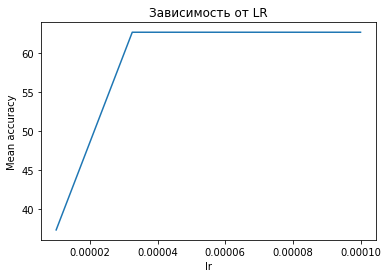

In [5]:
# График
plt.plot(lrGrid, outList)
plt.ylabel('Mean accuracy')
plt.xlabel('lr')
plt.title('Зависимость от LR')
plt.show()

## Регрессия

In [6]:
# регрессия
data = load_boston()
X = data.data
y = data.target
# print(y[:10])

In [7]:
# Зависимость от количества слоев (в каждом слое 1 нейрон)
outList = list()
DenseGrid = np.arange(1, 5)
for i in DenseGrid:
    print('Dense = ', i)
    model = Sequential()
    for j in range(i):
        model.add(Dense(1))
    adam = Adam(lr=0.00001)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['MSE'])
    # делим на тест и трейн
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#     folds = list(KFold(n_splits=2, shuffle=True, random_state=1).split(X, y)) 
#     X_train = list()
#     X_test = list()
#     y_train = list()
#     y_test = list()
#     for j in range(i):
#         X_train.append(X[folds[j][0]])
#         X_test.append(X[folds[j][1]])
#         y_train.append(y[folds[j][0]])
#         y_test.append(y[folds[j][1]])
    model.fit(X_train, y_train, epochs=150, batch_size=10)
    scores = model.evaluate(X_test, y_test)
    outList.append(scores[1])

Dense =  1
Epoch 1/150
339/339 [==============================] - 1s 2ms/step - loss: 45690.1835 - mean_squared_error: 45690.1835
Epoch 2/150
339/339 [==============================] - 0s 143us/step - loss: 45571.6866 - mean_squared_error: 45571.6866
Epoch 3/150
339/339 [==============================] - 0s 139us/step - loss: 45451.4509 - mean_squared_error: 45451.4509
Epoch 4/150
339/339 [==============================] - 0s 140us/step - loss: 45333.1069 - mean_squared_error: 45333.1069
Epoch 5/150
339/339 [==============================] - 0s 132us/step - loss: 45212.9432 - mean_squared_error: 45212.9432
Epoch 6/150
339/339 [==============================] - 0s 136us/step - loss: 45094.7875 - mean_squared_error: 45094.7875
Epoch 7/150
339/339 [==============================] - 0s 127us/step - loss: 44975.4624 - mean_squared_error: 44975.4624
Epoch 8/150
339/339 [==============================] - 0s 127us/step - loss: 44856.8562 - mean_squared_error: 44856.8562
Epoch 9/150
339/339 [==

339/339 [==============================] - 0s 212us/step - loss: 38222.8662 - mean_squared_error: 38222.8662
Epoch 69/150
339/339 [==============================] - 0s 180us/step - loss: 38119.6552 - mean_squared_error: 38119.6552
Epoch 70/150
339/339 [==============================] - 0s 185us/step - loss: 38016.0566 - mean_squared_error: 38016.0566
Epoch 71/150
339/339 [==============================] - 0s 187us/step - loss: 37912.4514 - mean_squared_error: 37912.4514
Epoch 72/150
339/339 [==============================] - 0s 189us/step - loss: 37810.7134 - mean_squared_error: 37810.7134
Epoch 73/150
339/339 [==============================] - 0s 200us/step - loss: 37707.2386 - mean_squared_error: 37707.2386
Epoch 74/150
339/339 [==============================] - 0s 144us/step - loss: 37604.9185 - mean_squared_error: 37604.9185
Epoch 75/150
339/339 [==============================] - 0s 131us/step - loss: 37502.8998 - mean_squared_error: 37502.8998
Epoch 76/150
339/339 [===============

Epoch 135/150
339/339 [==============================] - 0s 141us/step - loss: 31730.3947 - mean_squared_error: 31730.3947
Epoch 136/150
339/339 [==============================] - 0s 147us/step - loss: 31640.4335 - mean_squared_error: 31640.4335
Epoch 137/150
339/339 [==============================] - 0s 141us/step - loss: 31549.2291 - mean_squared_error: 31549.2291
Epoch 138/150
339/339 [==============================] - 0s 132us/step - loss: 31460.0193 - mean_squared_error: 31460.0193
Epoch 139/150
339/339 [==============================] - 0s 120us/step - loss: 31370.1447 - mean_squared_error: 31370.1447
Epoch 140/150
339/339 [==============================] - 0s 120us/step - loss: 31279.4765 - mean_squared_error: 31279.4765
Epoch 141/150
339/339 [==============================] - 0s 117us/step - loss: 31190.7367 - mean_squared_error: 31190.7367
Epoch 142/150
339/339 [==============================] - 0s 116us/step - loss: 31101.2214 - mean_squared_error: 31101.2214
Epoch 143/150
33

339/339 [==============================] - 0s 135us/step - loss: 56083.9119 - mean_squared_error: 56083.9119
Epoch 52/150
339/339 [==============================] - 0s 136us/step - loss: 55846.8865 - mean_squared_error: 55846.8865
Epoch 53/150
339/339 [==============================] - 0s 132us/step - loss: 55608.6687 - mean_squared_error: 55608.6687
Epoch 54/150
339/339 [==============================] - 0s 136us/step - loss: 55374.8151 - mean_squared_error: 55374.8151
Epoch 55/150
339/339 [==============================] - 0s 138us/step - loss: 55139.5560 - mean_squared_error: 55139.5560
Epoch 56/150
339/339 [==============================] - 0s 133us/step - loss: 54904.3077 - mean_squared_error: 54904.3077
Epoch 57/150
339/339 [==============================] - 0s 135us/step - loss: 54672.4079 - mean_squared_error: 54672.4079
Epoch 58/150
339/339 [==============================] - 0s 138us/step - loss: 54438.5976 - mean_squared_error: 54438.5976
Epoch 59/150
339/339 [===============

339/339 [==============================] - 0s 279us/step - loss: 41741.0289 - mean_squared_error: 41741.0289
Epoch 119/150
339/339 [==============================] - 0s 291us/step - loss: 41547.2520 - mean_squared_error: 41547.2520
Epoch 120/150
339/339 [==============================] - 0s 217us/step - loss: 41356.7387 - mean_squared_error: 41356.7387
Epoch 121/150
339/339 [==============================] - 0s 224us/step - loss: 41167.1429 - mean_squared_error: 41167.1429
Epoch 122/150
339/339 [==============================] - 0s 233us/step - loss: 40974.0056 - mean_squared_error: 40974.0056
Epoch 123/150
339/339 [==============================] - 0s 221us/step - loss: 40786.2337 - mean_squared_error: 40786.2337
Epoch 124/150
339/339 [==============================] - 0s 259us/step - loss: 40596.9310 - mean_squared_error: 40596.9310
Epoch 125/150
339/339 [==============================] - 0s 195us/step - loss: 40409.4330 - mean_squared_error: 40409.4330
Epoch 126/150
339/339 [=======

339/339 [==============================] - 0s 184us/step - loss: 34043.8154 - mean_squared_error: 34043.8154
Epoch 35/150
339/339 [==============================] - 0s 177us/step - loss: 33903.9441 - mean_squared_error: 33903.9441
Epoch 36/150
339/339 [==============================] - 0s 176us/step - loss: 33768.4472 - mean_squared_error: 33768.4472
Epoch 37/150
339/339 [==============================] - 0s 200us/step - loss: 33631.9126 - mean_squared_error: 33631.9126
Epoch 38/150
339/339 [==============================] - 0s 229us/step - loss: 33499.0019 - mean_squared_error: 33499.0019
Epoch 39/150
339/339 [==============================] - 0s 174us/step - loss: 33361.0895 - mean_squared_error: 33361.0895
Epoch 40/150
339/339 [==============================] - 0s 193us/step - loss: 33226.1538 - mean_squared_error: 33226.1538
Epoch 41/150
339/339 [==============================] - 0s 223us/step - loss: 33094.0457 - mean_squared_error: 33094.0457
Epoch 42/150
339/339 [===============

339/339 [==============================] - 0s 295us/step - loss: 26113.3621 - mean_squared_error: 26113.3621
Epoch 102/150
339/339 [==============================] - 0s 258us/step - loss: 26010.7004 - mean_squared_error: 26010.7004
Epoch 103/150
339/339 [==============================] - 0s 237us/step - loss: 25912.1301 - mean_squared_error: 25912.1301
Epoch 104/150
339/339 [==============================] - 0s 212us/step - loss: 25810.8049 - mean_squared_error: 25810.8049
Epoch 105/150
339/339 [==============================] - 0s 196us/step - loss: 25712.3856 - mean_squared_error: 25712.3856
Epoch 106/150
339/339 [==============================] - 0s 193us/step - loss: 25611.8893 - mean_squared_error: 25611.8893
Epoch 107/150
339/339 [==============================] - 0s 194us/step - loss: 25513.3516 - mean_squared_error: 25513.3516
Epoch 108/150
339/339 [==============================] - 0s 219us/step - loss: 25416.6030 - mean_squared_error: 25416.6030
Epoch 109/150
339/339 [=======

339/339 [==============================] - 0s 197us/step - loss: 3101.5118 - mean_squared_error: 3101.5118
Epoch 18/150
339/339 [==============================] - 0s 194us/step - loss: 3075.2775 - mean_squared_error: 3075.2775
Epoch 19/150
339/339 [==============================] - 0s 194us/step - loss: 3049.1951 - mean_squared_error: 3049.1951
Epoch 20/150
339/339 [==============================] - 0s 201us/step - loss: 3023.4156 - mean_squared_error: 3023.4156
Epoch 21/150
339/339 [==============================] - 0s 198us/step - loss: 2997.8544 - mean_squared_error: 2997.8544
Epoch 22/150
339/339 [==============================] - 0s 334us/step - loss: 2972.6087 - mean_squared_error: 2972.6087
Epoch 23/150
339/339 [==============================] - 0s 286us/step - loss: 2947.4044 - mean_squared_error: 2947.4044
Epoch 24/150
339/339 [==============================] - 0s 190us/step - loss: 2922.4247 - mean_squared_error: 2922.4247
Epoch 25/150
339/339 [==============================]

339/339 [==============================] - 0s 203us/step - loss: 1728.7709 - mean_squared_error: 1728.7709
Epoch 86/150
339/339 [==============================] - 0s 190us/step - loss: 1713.4186 - mean_squared_error: 1713.4186
Epoch 87/150
339/339 [==============================] - 0s 202us/step - loss: 1698.3417 - mean_squared_error: 1698.3417
Epoch 88/150
339/339 [==============================] - 0s 202us/step - loss: 1683.3117 - mean_squared_error: 1683.3117
Epoch 89/150
339/339 [==============================] - 0s 192us/step - loss: 1668.4064 - mean_squared_error: 1668.4064
Epoch 90/150
339/339 [==============================] - 0s 179us/step - loss: 1653.6968 - mean_squared_error: 1653.6968
Epoch 91/150
339/339 [==============================] - 0s 203us/step - loss: 1638.9560 - mean_squared_error: 1638.9560
Epoch 92/150
339/339 [==============================] - 0s 267us/step - loss: 1624.3094 - mean_squared_error: 1624.3094
Epoch 93/150
339/339 [==============================]

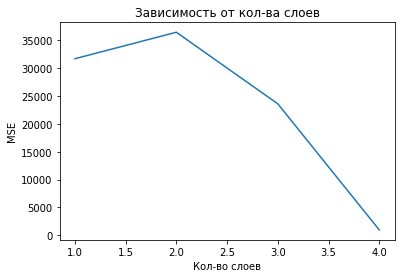

In [8]:
# График
plt.plot(DenseGrid, outList)
plt.ylabel('MSE')
plt.xlabel('Кол-во слоев')
plt.title('Зависимость от кол-ва слоев')
plt.show()